# QOSF: Task 2
## Objective: To optimise a parametric quantum circuit of choice to return $|01\rangle$ and $|10\rangle$ with equal probabilities
## Constraints:
- The circuit should be a combination of gates fromed using the gates $R_x$,$R_y$ and $CNOT$, where:
\begin{align}
R_x(\theta)=&cos(\theta/2)\cdot\mathbb{1}+isin(\theta/2)\cdot\sigma_x\\
R_y(\theta)=&cos(\theta/2)\cdot\mathbb{1}+isin(\theta/2)\cdot\sigma_y\\
\end{align}
- Input to the circuit is taken to be $|00\rangle$.
- Parameters of the gates to be optimised by performing $n=1,10,100,1000$ quantum measurements with noise.

## Sketch of the solution:
### I propose the following quantum circuit, as I know at least 2 possible ways $(a,b,c)=(\pi/2,\pi/2,\pi)$ and $(a,b,c)=(\pi,\pi/2,\pi)$ to obtain the desired output, that is, equal superposition of  $|01\rangle$ and $|10\rangle$.

<img src="images/circuit.png" width="400"/>

### In order to find the action of this circuit on the input state $|00\rangle$, we first compute the action of the operators prior to $CNOT$, then take the $CNOT$ on the resultant two qubit state. Following is the algebra:

### Top branch:
- $R_x(a)|0\rangle=[cos\frac{a}{2}\cdot\mathbb{1}+isin\frac{a}{2}\cdot\sigma_x]|0\rangle=cos\frac{a}{2}|0\rangle+isin\frac{a}{2}|1\rangle$
- $R_y(b)|0\rangle=[cos\frac{b}{2}\cdot\mathbb{1}+isin\frac{b}{2}\cdot\sigma_y]|0\rangle=cos\frac{b}{2}|0\rangle-sin\frac{b}{2}|1\rangle$
- $R_y(b)|1\rangle=[cos\frac{b}{2}\cdot\mathbb{1}+isin\frac{b}{2}\cdot\sigma_y]|1\rangle=cos\frac{b}{2}|1\rangle+sin\frac{b}{2}|0\rangle$
<br><br>
- $R_y(b)\cdot R_x(a)|0\rangle=R_y(b)\cdot[cos\frac{a}{2}|0\rangle+isin\frac{a}{2}|1\rangle]=cos\frac{a}{2}\cdot [R_y(b)|0\rangle]+isin\frac{a}{2}\cdot [R_y(b)|1\rangle]$
<br>
$=cos\frac{a}{2}\cdot [cos\frac{b}{2}|0\rangle-sin\frac{b}{2}|1\rangle]+isin\frac{a}{2}\cdot[cos\frac{b}{2}|1\rangle+sin\frac{b}{2}|0\rangle]$
<br>
$=[cos\frac{a}{2}cos\frac{b}{2}+isin\frac{a}{2}sin\frac{b}{2}]|0\rangle+[-cos\frac{a}{2}sin\frac{b}{2}+isin\frac{a}{2}cos\frac{b}{2}]|1\rangle$

### Bottom branch:
- $R_x(c)|0\rangle=[cos\frac{c}{2}\cdot\mathbb{1}+isin\frac{c}{2}\cdot\sigma_x]|0\rangle=cos\frac{c}{2}|0\rangle+isin\frac{c}{2}|1\rangle$

### Taking tensor product (just before CNOT):
- $[R_y(b)\cdot R_x(a)|0\rangle] \otimes R_x(c)|0\rangle$
<br>
$=|00\rangle[cos\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}]+|01\rangle[icos\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |10\rangle[-cos\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}]+|11\rangle[-icos\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}]$

### Apply CNOT (that is swap $|10\rangle\leftrightarrow|11\rangle$):
- Output state is given by, $|\psi\rangle$
<br><br>
$=|00\rangle[cos\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}]$
<br>
$+\ |01\rangle[icos\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |10\rangle[-icos\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}-sin\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |11\rangle[-cos\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}+isin\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}]$
<br><br>
$\equiv f_0|00\rangle+f_1|01\rangle+f_2|10\rangle+f_3|11\rangle$

***
# Code:
## Imports

In [1]:
import numpy as np 
import random as rd
from numpy import sin,cos 
import matplotlib.pyplot as plt

## Measurement process:
- Given the parameters $a,b,c$ of the gates, exact probabilities of collapse to the states $|00\rangle,|01\rangle,|10\rangle,|11\rangle$ is given by $P_0=|f_0|^2,P_1=|f_1|^2,P_2=|f_2|^2,P_3=|f_3|^2$ where the coefficients $f_i's$ come from the output state $|\psi\rangle$ computed above. 
- We simulate quantum measurement by sampling using the 4 probabilities, **n_meas** (number of measurements) times to reconstruct the probability ditribution based off the measurement process.
- The function below, **prob_from_measurement** returns the probability distribution $P_0,P_1,P_2,P_3$ post measurement, which would be later used to compute the loss function for the gradient descent and associated gradients along the 3 parameters $a,b,c$.
- The **noise** function adds uniform noise to measurement probability **p**. 

In [2]:
def noise(p,percent): #to generate measurement noise
    P=max(p+np.random.uniform(-percent/200,percent/200),0)
    return P

def prob_from_measurement(a,b,c,n_meas=1,noise_percent=5): #to simulate measurement
    
    p0=cos(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2) # p0=|f0|^2
    p1=sin(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2) # p1=|f1|^2
    p2=sin(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2) # p2=|f2|^2
    p3=cos(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2) # p3=|f3|^2
    
    p0=noise(p0,noise_percent) #noise added to measurement outcome
    p1=noise(p1,noise_percent)
    p2=noise(p2,noise_percent)
    p3=noise(p3,noise_percent)

    meas_outcomes=rd.choices([0,1,2,3],[p0,p1,p2,p3],k=n_meas) #sampling from the ideal probability distribution
    P0=meas_outcomes.count(0)/n_meas #probabilities obtained as a result of sampling (measurement)
    P1=meas_outcomes.count(1)/n_meas
    P2=meas_outcomes.count(2)/n_meas
    P3=meas_outcomes.count(3)/n_meas

    return P0,P1,P2,P3 

## Loss function for the gradient descent:
- Since we require the states $|01\rangle,|10\rangle$ with 50%:50% probabilities, a natural choice is the encode these constraints $P_1=P_2=0.5$ into a loss function of the form, loss, $L=(P_0-0)^2+(P_1-0.5)^2+(P_2-0.5)^2+(P_3-0)^2=P_0^2+(P_1-0.5)^2+(P_2-0.5)^2+P_3^2$. 
- Loss is minimised when $P_1=P_2=0.5$ and $P_0=P_3=0$, which is the desired outcome.

In [3]:
def loss_function(p0,p1,p2,p3): #loss function for gradient descent
    return p0**2+(p1-0.5)**2+(p2-0.5)**2+p3**2

## Computing the gradients along $a,b,c$:
- Since we know the loss function, $L\equiv L(a,b,c)$, we can compute the gradients along the $a,b,c$ directions using the derivatives **grad_a**=$\frac{\partial L}{\partial a}$, similarly for **grad_b**, **grad_c**.
- The **gradient** function below returns 3 gradients **grad_a**,**grad_b**, **grad_c** where the probabilites $P_0,P_1,P_2,P_3$ are taken from the measurement process.


In [4]:
def gradient(a,b,c,p0,p1,p2,p3): #computing gradients

    grad_a=sin(a)*cos(b)*(cos(c/2)**2*(p3-p0)+sin(c/2)**2*(p2-p1)) #gradient along a (Rx)
    grad_b=sin(b)*cos(a)*(cos(c/2)**2*(p3-p0)+sin(c/2)**2*(p2-p1)) #gradient along b (Ry)
    grad_c_term1=sin(c)*((cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)*(p1-p0-0.5))
    grad_c_term2=sin(c)*((cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)*(p2-p3-0.5))
    grad_c=grad_c_term1+grad_c_term2 #gradient along c (Rx)
    return grad_a,grad_b,grad_c

## The gradient descent:
- The following function impliments the gradient descent, attempting to reach the desired output, that is $P_1=P_2=0.5$.
- The probabilities from the measurements are used to compute the loss function (or error) and the gradients used for the gradient descent.
- **rate** is the learning rate, **err** is the threshold for loss (or error) before the algorith terminates, **max_steps** are the maximum number of steps for the algorithm to run.
- The probabilities output/print after termination of the algorithm are printed in the order **prob:** $P_0\ P_1\  P_2\ P_3$.

In [5]:
def gradient_descent(err=10**-8,rate=1,max_steps=1000,n_meas=10):
    a=0.1;b=0.1;c=0.1 #intial parameters for the gates
    step=1 
    P0,P1,P2,P3=prob_from_measurement(a,b,c,n_meas) #measurement outcome
    grad=np.array(gradient(a,b,c,P0,P1,P2,P3)) #gradients computed based on measurement outcome
    a-=grad[0]*rate #parameters updated
    b-=grad[1]*rate
    c-=grad[2]*rate
    e=loss_function(P0,P1,P2,P3) #loss function
    while(e>err and step<max_steps): # repeat until low error or max steps reached.
        step+=1
        P0,P1,P2,P3=prob_from_measurement(a,b,c,n_meas)
        grad=np.array(gradient(a,b,c,P0,P1,P2,P3))
        a-=grad[0]*rate
        b-=grad[1]*rate
        c-=grad[2]*rate
        e=loss_function(P0,P1,P2,P3)
    print('step:%5d|  a:%0.3f b:%0.3f c:%0.3f|  error:%0.2e|  prob: %.2f,  %.2f,  %.2f,  %.2f'%(step,a,b,c,e,P0,P1,P2,P3))	

## Plotting the loss landscape:
- the following function plots the contours for loss function at a fixed $a$ value, so that we can visualise the gradients applicable.

In [6]:
def plot_bc(a): #plotting the loss landscape independently
    fig,ax=plt.subplots(figsize=(6,6))
    b = np.arange(0, np.pi+0.2, 0.1)
    c = np.arange(0, 2*np.pi+0.2, 0.1)
    b, c = np.meshgrid(b, c)
    p0=cos(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)
    p1=sin(c/2)**2*(cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)
    p2=sin(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)
    p3=cos(c/2)**2*(cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)
    Z=loss_function(p0,p1,p2,p3)

    cf=ax.contourf(b,c,Z)
    fig.colorbar(cf, ax=ax)
    ax.set_xlabel('$b$', fontsize=20)
    ax.set_title('$a=%0.2f$'%(a),fontsize=20)
    ax.set_ylabel('$c$',fontsize=20)
    plt.show()

***
# Program Run (Calling gradient descent function):

In [7]:
for i in range(10):
    gradient_descent(n_meas=1) #1 measurement per step
                               #The output keeps hopping between |01> and |10> because the output state is an
                               #equal superposition and we are preforming only 1 measurement at a time.

step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  1.00,  0.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  0.00,  1.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  0.00,  1.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  0.00,  1.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  1.00,  0.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  0.00,  1.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  0.00,  1.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  1.00,  0.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  0.00,  1.00,  0.00
step: 1000|  a:1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  1.00,  0.00,  0.00


In [8]:
for i in range(10):
    gradient_descent(n_meas=10) #10 measurements per step

step:    8|  a:1.136 b:1.136 c:2.408|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:    8|  a:1.323 b:1.323 c:2.662|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:    7|  a:0.846 b:0.846 c:2.298|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   11|  a:1.321 b:1.321 c:2.575|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   16|  a:1.536 b:1.536 c:2.702|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   14|  a:1.276 b:1.276 c:2.700|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:    8|  a:1.191 b:1.191 c:2.717|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   12|  a:1.148 b:1.148 c:2.765|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   16|  a:1.510 b:1.510 c:2.714|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   17|  a:1.513 b:1.513 c:2.886|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00


In [9]:
for i in range(10):
    gradient_descent(n_meas=100) #100 measurement per step

step:   44|  a:1.493 b:1.493 c:2.963|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   74|  a:1.431 b:1.431 c:3.025|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   34|  a:1.495 b:1.495 c:2.900|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   52|  a:1.492 b:1.492 c:2.961|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  178|  a:1.470 b:1.470 c:3.106|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   82|  a:1.497 b:1.497 c:3.030|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   35|  a:1.449 b:1.449 c:2.868|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   34|  a:1.412 b:1.412 c:2.909|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   99|  a:1.529 b:1.529 c:3.069|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  106|  a:1.498 b:1.498 c:3.078|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00


In [10]:
for i in range(10):
    gradient_descent(n_meas=1000) #1000 measurement per step

step:  137|  a:1.508 b:1.508 c:3.084|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  107|  a:1.489 b:1.489 c:3.058|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   58|  a:1.453 b:1.453 c:2.977|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   29|  a:1.430 b:1.430 c:2.861|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  195|  a:1.546 b:1.546 c:3.112|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  492|  a:1.562 b:1.562 c:3.141|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  238|  a:1.507 b:1.507 c:3.125|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:   27|  a:1.413 b:1.413 c:2.832|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  176|  a:1.531 b:1.531 c:3.109|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00
step:  197|  a:1.515 b:1.515 c:3.116|  error:0.00e+00|  prob: 0.00,  0.50,  0.50,  0.00


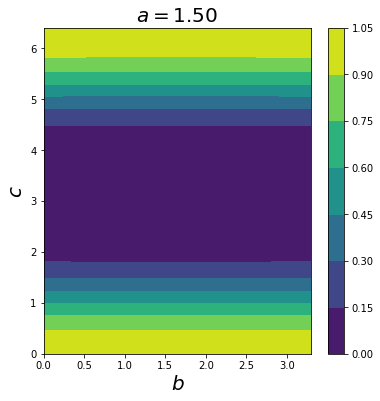

In [11]:
plot_bc(1.5) #loss function landscape for a=1.5

***
# Bonus Question:

# We make two small changes:
## 1. We swap $R_x$ and $R_y$ in the top branch to obtain the following circuit.


<img src="images/circuit_bonus_q.png" width="400"/>

- Output state is now given by, $|\psi\rangle$
<br><br>
$=|00\rangle[cos\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}-isin\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}]$
<br>
$+\ |01\rangle[icos\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}+sin\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |10\rangle[-cos\frac{a}{2}sin\frac{b}{2}sin\frac{c}{2}-isin\frac{a}{2}cos\frac{b}{2}sin\frac{c}{2}]$
<br>
$+\ |11\rangle[icos\frac{a}{2}sin\frac{b}{2}cos\frac{c}{2}-sin\frac{a}{2}cos\frac{b}{2}cos\frac{c}{2}]$
<br><br>
$\equiv f_0|00\rangle+f_1|01\rangle+f_2|10\rangle+f_3|11\rangle$

In [12]:
def output_state(a,b,c): #state |psi>
    np.set_printoptions(formatter={'complex_kind': '{:.2f}'.format})
    Psi=np.zeros(4,dtype=complex)
    Psi[0]=cos(a/2)*cos(b/2)*cos(c/2)-1j*sin(a/2)*sin(b/2)*cos(c/2) #f_0 in f_0|00>
    Psi[1]=1j*cos(a/2)*cos(b/2)*sin(c/2)+sin(a/2)*sin(b/2)*sin(c/2) #f_1 in f_1|01>
    Psi[2]=-cos(a/2)*sin(b/2)*sin(c/2)-1j*sin(a/2)*cos(b/2)*sin(c/2)#f_2 in f_2|10>
    Psi[3]=1j*cos(a/2)*sin(b/2)*cos(c/2)-sin(a/2)*cos(b/2)*cos(c/2) #f_3 in f_3|11>
    Psi*=-(1+1j)#overall global phase for simplicity
    return Psi

## 2. We add an addition overlap term in the loss function, which measures the overlap between the desired output state and the current output state:

- Desired state ,$|\phi\rangle=\frac{|01\rangle+|10\rangle}{\sqrt{2}}$.
- Output state is $|\psi\rangle$ as given above.
- Overlap between the two states, $|\langle \phi|\psi\rangle|^2=\frac{1}{2}sin^2\frac{c}{2}(sin\frac{a}{2}-cos\frac{a}{2})^2$
- As we require that overlap=1, we add the term **l_overlap**=$(1-|\langle \phi|\psi\rangle|^2)^2$ to the original loss function from the previous problem to get **loss_function_2** given below.

In [13]:
def loss_function_2(p0,p1,p2,p3,a,b,c):
    l_overlap=(1-0.5*sin(c/2)**2*(sin(a/2)-cos(a/2))**2)**2
    return p0**2+(p1-0.5)**2+(p2-0.5)**2+p3**2+l_overlap

## Additional gradient terms due to overlap:
- The **gradient** function is modified to include the additional terms due to gradient of the **l_overlap** term with respect to $a,c$ (since gradient with respect to $b$ is zero). The terms **g_overlap_a** and **g_overlap_c** are added to the previous gradient function to get **gradient_2**.
- The gradient descent function remains the same, except that it now print the final output wavefunction after the algorithm terminates.

In [14]:
def gradient_2(a,b,c,p0,p1,p2,p3):
    grad_a=sin(a)*cos(b)*(cos(c/2)**2*(p3-p0)+sin(c/2)**2*(p2-p1))
    grad_b=sin(b)*cos(a)*(cos(c/2)**2*(p3-p0)+sin(c/2)**2*(p2-p1))
    grad_c_term1=sin(c)*((cos(a/2)**2*cos(b/2)**2+sin(a/2)**2*sin(b/2)**2)*(p1-p0-0.5))
    grad_c_term2=sin(c)*((cos(a/2)**2*sin(b/2)**2+sin(a/2)**2*cos(b/2)**2)*(p2-p3-0.5))
    grad_c=grad_c_term1+grad_c_term2
    
    g_overlap_a=(1-0.5*sin(c/2)**2*(sin(a/2)-cos(a/2))**2)*sin(c/2)**2*(cos(a/2)**2-sin(a/2)**2) #overlap gradient term
    g_overlap_c=-0.5*(1-0.5*sin(c/2)**2*(sin(a/2)-cos(a/2))**2)*sin(c)*(sin(a/2)-cos(a/2))**2  #overlap gradient term
    
    grad_a+=g_overlap_a
    grad_c+=g_overlap_c
    
    return grad_a,grad_b,grad_c

In [15]:
def gradient_descent_2(err=10**-8,rate=1,max_steps=10000,n_meas=10):
    a=0.1;b=0.1;c=0.1
    step=1
    P0,P1,P2,P3=prob_from_measurement(a,b,c,n_meas)
    grad=np.array(gradient_2(a,b,c,P0,P1,P2,P3))
    a-=grad[0]*rate
    b-=grad[1]*rate
    c-=grad[2]*rate
    e=loss_function_2(P0,P1,P2,P3,a,b,c)
    while(e>err and step<max_steps):
        step+=1
        P0,P1,P2,P3=prob_from_measurement(a,b,c,n_meas)
        grad=np.array(gradient_2(a,b,c,P0,P1,P2,P3))
        a-=grad[0]*rate
        b-=grad[1]*rate
        c-=grad[2]*rate
        e=loss_function_2(P0,P1,P2,P3,a,b,c)
    print('step:%5d|  a:%0.3f b:%0.3f c:%0.3f|  error:%0.2e|  prob: %.2f,  %.2f,  %.2f,  %.2f'%(step,a,b,c,e,P0,P1,P2,P3))
    print('\nbasis:       %10s %10s %10s %10s'%('|00>','|01>','|10>','|11>'))
    print('output psi=',output_state(a,b,c))

***
# Program Run (Calling gradient descent function):

In [16]:
gradient_descent_2(n_meas=1) #1 measurement per step

step:10000|  a:-1.571 b:1.571 c:3.142|  error:5.00e-01|  prob: 0.00,  1.00,  0.00,  0.00

basis:             |00>       |01>       |10>       |11>
output psi= [-0.00-0.00j 1.00-0.00j 1.00+0.00j 0.00-0.00j]


In [17]:
gradient_descent_2(n_meas=10) #10 measurements per step

step:  135|  a:-1.561 b:1.560 c:3.129|  error:4.56e-09|  prob: 0.00,  0.50,  0.50,  0.00

basis:             |00>       |01>       |10>       |11>
output psi= [-0.00-0.01j 1.00-0.01j 1.00-0.00j -0.00-0.01j]


In [18]:
gradient_descent_2(n_meas=100) #100 measurements per step

step:  305|  a:-1.556 b:1.595 c:3.141|  error:3.20e-09|  prob: 0.00,  0.50,  0.50,  0.00

basis:             |00>       |01>       |10>       |11>
output psi= [0.00-0.00j 1.00+0.00j 1.00+0.02j 0.00-0.00j]


In [19]:
gradient_descent_2(n_meas=1000) #1000 measurements per step

step: 2075|  a:-1.560 b:1.585 c:3.142|  error:7.91e-10|  prob: 0.00,  0.50,  0.50,  0.00

basis:             |00>       |01>       |10>       |11>
output psi= [0.00-0.00j 1.00+0.00j 1.00+0.01j 0.00-0.00j]
